## K-Means

Leverage K-means to identify anomolies and cluster together the numerical variables. 

In [1]:
import sys
import os
import seaborn as sns 
sys.path.append(os.path.abspath('..'))

from standardize_visuals import theme_color_names, generate_cmap_theme, create_custom_palette
custom_palette= create_custom_palette()

sns.set_palette(custom_palette)


In [2]:
# Uncomment to get the correct versions
from IPython.display import clear_output
!pip install -r ../requirements.txt
clear_output() 


In [3]:
import pandas as pd 
import numpy as np 

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
RANDOM_SEED = 42 

In [7]:
df = pd.read_csv('../data/imputed_dataset.csv')
df.head()

,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,is_drafted,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group
0,Dorial Green-Beckham,0.9997,1.0,2012,WR,78.0,220.0,37.216678,-93.292037,Springfield,MO,USA,5,Missouri,531380.0,1.0,SEC,38.935849,-92.333201,18.0,26.0,1.0,300.0,0.692308,129.726375,offense,pass_catcher
1,Mario Edwards,0.9995,2.0,2012,DT,75.0,285.0,33.215039,-97.133052,Denton,TX,USA,5,Florida State,530290.0,1.0,ACC,30.438169,-84.304403,19.0,27.0,2.0,366.0,0.703704,776.590432,defense,d_line
2,D.J. Humphries,0.9979,3.0,2012,OT,77.0,275.0,35.227200,-80.843083,Charlotte,NC,USA,5,Florida,-1009881.0,1.0,SEC,29.649936,-82.348579,15.0,26.0,2.0,178.0,0.576923,395.212334,offense,o_line
3,Shaq Thompson,0.9975,4.0,2012,S,74.0,210.0,38.581572,-121.494400,Sacramento,CA,USA,5,Washington,535329.0,1.0,Big Ten,47.650323,-122.301575,14.0,26.0,1.0,-130.0,0.538462,627.908306,defense,d_backfield
4,Noah Spence,0.9974,5.0,2012,WDE,75.0,235.0,40.266311,-76.886112,Harrisburg,PA,USA,5,Ohio State,-1027150.0,1.0,Big Ten,40.001645,-83.019727,18.0,26.0,1.0,363.0,0.692308,324.459618,defense,d_line


## Numerical Variables 


In [8]:
df.dtypes

name                               object
rating                            float64
ranking                           float64
year                                int64
position                           object
height                            float64
weight                            float64
latitude                          float64
longitude                         float64
hometown_city                      object
state_province                     object
hometown_country                   object
stars                               int64
committed_to                       object
athlete_id                        float64
is_drafted                        float64
conference                         object
latitude_school                   float64
longitude_school                  float64
wins_rolling_2year                float64
games_played_rolling_2year        float64
post_season_wins_rolling_2year    float64
point_diff_rolling_2year          float64
win_pct_rolling_2year             

In [9]:
# Features
player_info = ['name','athlete_id','latitude', 'longitude', 'latitude_school','longitude_school','committed_to', 'side_of_ball', 'position_group', 'state_province','hometown_city','hometown_country', 'conference','position'] 
# numerical_features=  ['height', 'weight', 'distance_miles']#, 'stars']#, 'win_pct_rolling_2year']
numerical_features=  [
                        'height', 'weight', 'distance_miles', 
                        'stars','win_pct_rolling_2year',
                        'rating'
                    ]


In [10]:
X = df[numerical_features]
y = df[['is_drafted']]

In [11]:
# Preprocess the numerical variables so then all the features are weigthed evenly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
X.head() 

,height,weight,distance_miles,stars,win_pct_rolling_2year,rating
0,78.0,220.0,129.726375,5,0.692308,0.9997
1,75.0,285.0,776.590432,5,0.703704,0.9995
2,77.0,275.0,395.212334,5,0.576923,0.9979
3,74.0,210.0,627.908306,5,0.538462,0.9975
4,75.0,235.0,324.459618,5,0.692308,0.9974


### Find the optimal amount of clusters

In [13]:
import time

def find_optimal_amount_of_clusters(K = range(2,10), X_scaled=pd.DataFrame(), verbose=False): 
    # Determine the optimal nunmber of clusters
    
    Sum_of_squared_distances = []
    silhouette_avg = []

    start = time.time()

    for num_clusters in K :
        kmeans = KMeans(n_clusters=num_clusters, random_state=RANDOM_SEED)
        kmeans.fit(X_scaled)
        cluster_labels = kmeans.labels_

        Sum_of_squared_distances.append(kmeans.inertia_)

        silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

    end = time.time()
    max_index = silhouette_avg.index(max(silhouette_avg))
    max_num_clusters = max_index+2
    print(f'Total Runtime: {end - start}')

    if verbose: 

        # Silhouette Score 
        print(f'Max Silhouette Score: {max(silhouette_avg)}')

        plt.plot(K,silhouette_avg,'bx-')
        plt.xlabel('Values of K') 
        plt.ylabel('Silhouette score') 
        plt.axvline(x=max_num_clusters, color='red', linestyle='--', label='Optimal K')
        plt.title('Silhouette analysis For Optimal k')
        plt.show()

        # Elbow method 
        plt.plot(K,Sum_of_squared_distances,'bx-')
        plt.xlabel('Values of K') 
        plt.ylabel('Sum of squared distances/Inertia') 
        plt.axvline(x=max_num_clusters, color='red', linestyle='--', label='Optimal K')
        plt.title('Elbow Method For Optimal k')
        plt.show()
        
    return max_num_clusters



In [14]:
max_num_clusters = find_optimal_amount_of_clusters(K = range(2,10), X_scaled=X_scaled)

Total Runtime: 54.85390520095825


In [15]:
print(max_num_clusters)

6


In [16]:
df.head() 

,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,is_drafted,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group
0,Dorial Green-Beckham,0.9997,1.0,2012,WR,78.0,220.0,37.216678,-93.292037,Springfield,MO,USA,5,Missouri,531380.0,1.0,SEC,38.935849,-92.333201,18.0,26.0,1.0,300.0,0.692308,129.726375,offense,pass_catcher
1,Mario Edwards,0.9995,2.0,2012,DT,75.0,285.0,33.215039,-97.133052,Denton,TX,USA,5,Florida State,530290.0,1.0,ACC,30.438169,-84.304403,19.0,27.0,2.0,366.0,0.703704,776.590432,defense,d_line
2,D.J. Humphries,0.9979,3.0,2012,OT,77.0,275.0,35.227200,-80.843083,Charlotte,NC,USA,5,Florida,-1009881.0,1.0,SEC,29.649936,-82.348579,15.0,26.0,2.0,178.0,0.576923,395.212334,offense,o_line
3,Shaq Thompson,0.9975,4.0,2012,S,74.0,210.0,38.581572,-121.494400,Sacramento,CA,USA,5,Washington,535329.0,1.0,Big Ten,47.650323,-122.301575,14.0,26.0,1.0,-130.0,0.538462,627.908306,defense,d_backfield
4,Noah Spence,0.9974,5.0,2012,WDE,75.0,235.0,40.266311,-76.886112,Harrisburg,PA,USA,5,Ohio State,-1027150.0,1.0,Big Ten,40.001645,-83.019727,18.0,26.0,1.0,363.0,0.692308,324.459618,defense,d_line


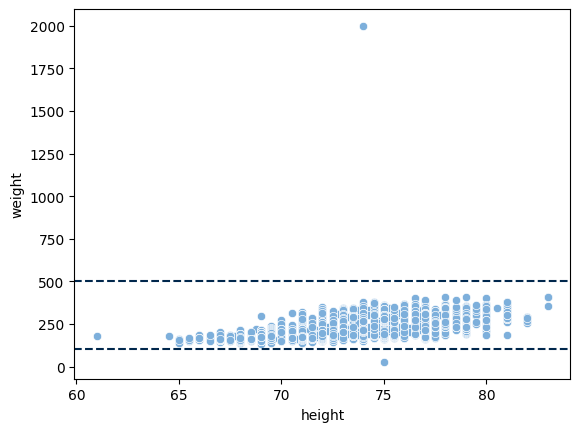

In [17]:
sns.scatterplot(data=df, x='height', y='weight', color=theme_color_names['light_blue'])
plt.axhline(y=100, color=theme_color_names['blue'], linestyle='--')
plt.axhline(y=500, color=theme_color_names['blue'], linestyle='--')

plt.show() 

### Optimal Clusters

Based on the silhoutte score and the squared mean error, the optimal amount of clusters is 4. 

In [18]:
# Apply KMeans clustering on the standardized data
# max_num_clusters = find_optimal_amount_of_clusters()
kmeans = KMeans(n_clusters=max_num_clusters, random_state=RANDOM_SEED)
kmeans.fit(X_scaled)


KMeans(n_clusters=6, random_state=42)

In [19]:
# Get the cluster centers and the labels (which cluster each data point belongs to)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

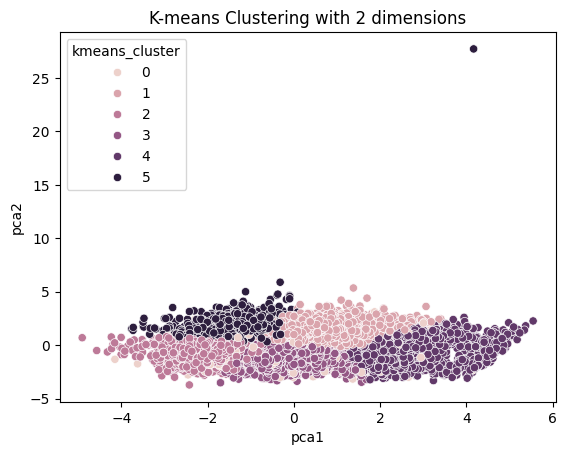

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns 

# Plot out the kmeans clusters into a 2D Plot
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X_scaled)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
results["kmeans_cluster"] = kmeans.labels_

results.head()

sns.scatterplot(x="pca1", y="pca2", hue=results['kmeans_cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [21]:
# Save the assigned cluster and the pca values to df 
df['k_means_cluster'] = results['kmeans_cluster']
df['k_means_pca1'] = results['pca1']
df['k_means_pca2'] = results['pca2']

In [22]:
# Euclidean Distance usd to measure the distance between the center and the points 
# Considered far if it's 3 std away from the mean
distances = np.linalg.norm(X_scaled - centers[labels], axis=1)
threshold = np.mean(distances) + 2 * np.std(distances) 
far_points_indices = np.where(distances > threshold)[0]



In [23]:
# Save distance to df 
df['k_means_distance_to_centroid'] = distances


In [24]:
# Show the far points in the dataframe
df_far_points = df.iloc[far_points_indices]


In [25]:
print(f"Number of points far from their centroid: {df_far_points.shape[0]}")


Number of points far from their centroid: 574


In [26]:
df.shape[0]

23947

In [27]:
# Prepare to export the data 
additional_features = ['k_means_cluster', 'k_means_pca1', 'k_means_pca2','k_means_distance_to_centroid']
anomoly_df = df_far_points[player_info + numerical_features + additional_features].sort_values(by='k_means_distance_to_centroid', ascending=False)



# Investigate Data Anomolies

In [28]:
# save al the players names and athlete_id that we should drop 
remove_df = pd.DataFrame()
anomoly_df.head() 

,name,athlete_id,latitude,longitude,latitude_school,longitude_school,committed_to,side_of_ball,position_group,state_province,hometown_city,hometown_country,conference,position,height,weight,distance_miles,stars,win_pct_rolling_2year,rating,k_means_cluster,k_means_pca1,k_means_pca2,k_means_distance_to_centroid
7676,Marques Moore,3125868.0,40.961171,-80.557571,41.139094,-81.313460,Kent State,defense,linebacker,OH,New Middletown,USA,Mid-American,ILB,74.0,2000.0,41.260357,1,0.576923,0.6997,5,4.166569,27.714579,38.682786
16279,Marquez Ezzard,4362505.0,33.532005,131.349674,25.957967,-80.238860,Miami,athlete,athlete,NaN,NaN,USA,ACC,ATH,73.0,213.0,7833.078474,4,0.730769,0.8939,0,1.678195,-2.322391,10.274784
18059,Brandon Joseph,NaN,33.532005,131.349674,33.735267,-84.389949,Georgia State,offense,o_line,NaN,NaN,USA,Sun Belt,OG,74.0,280.0,7242.867348,2,0.416667,0.7903,0,-1.527672,0.102231,9.183271
21015,Jack Zergiotis,4428977.0,33.532005,131.349674,41.759568,-72.618773,UConn,offense,qb,NaN,NaN,USA,FBS Independents,DUAL,72.0,180.0,7016.742209,2,0.166667,0.7842,0,-2.610004,-1.728495,8.932464
16665,Arquon Bush,4360067.0,33.532005,131.349674,39.131250,-84.516191,Cincinnati,defense,d_backfield,NaN,NaN,USA,Big 12,CB,71.0,167.0,6916.389684,3,0.333333,0.8646,0,-0.608479,-2.788909,8.592570


In [29]:
def remove_value(anomoly_df,remove_df , indices=[], reason=None): 
    # Ensure the index exists in the dataframe
    # if index in df.index:
    for index in indices: 
        row_to_remove = anomoly_df.loc[[index]]  # .loc[[index]] keeps it as a DataFrame
        row_to_remove['remove_reason'] = reason
        remove_df = pd.concat([remove_df, row_to_remove])
        anomoly_df = anomoly_df.drop(index)
        
    anomoly_df.reset_index(inplace=True,drop=True)
    remove_df.reset_index(inplace=True,drop=True)
    return anomoly_df,remove_df 

## 1. Remove mistyped weights and heights

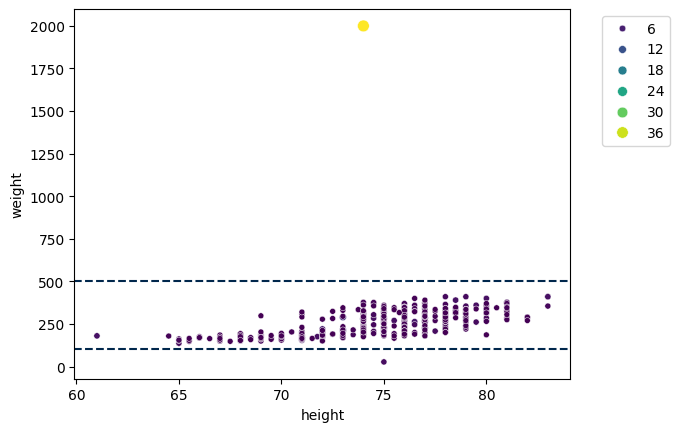

In [30]:
sns.scatterplot(data=anomoly_df, x='height', y='weight', hue='k_means_distance_to_centroid', size='k_means_distance_to_centroid', palette='viridis')
plt.axhline(y=100, color=theme_color_names['blue'], linestyle='--')
plt.axhline(y=500, color=theme_color_names['blue'], linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show() 

In [31]:
# These are probably mistyped datapoints 
anomoly_df[(anomoly_df['weight'] < 100 ) | (anomoly_df['weight']>1000)][['name','athlete_id','height', 'weight']].head() 

,name,athlete_id,height,weight
7676,Marques Moore,3125868.0,74.0,2000.0
15723,Nico Difronzo,NaN,75.0,27.0


In [32]:
# Remove from anomoly_df, remove_df 
anomoly_df,remove_df = remove_value(anomoly_df,remove_df , indices=[7676,15723], reason='Invalid Weight and Height')


## 2. Remove Invalid Longitude & Latitudes 

Text(0.5, 1.0, "Player's Latitude and Longitude")

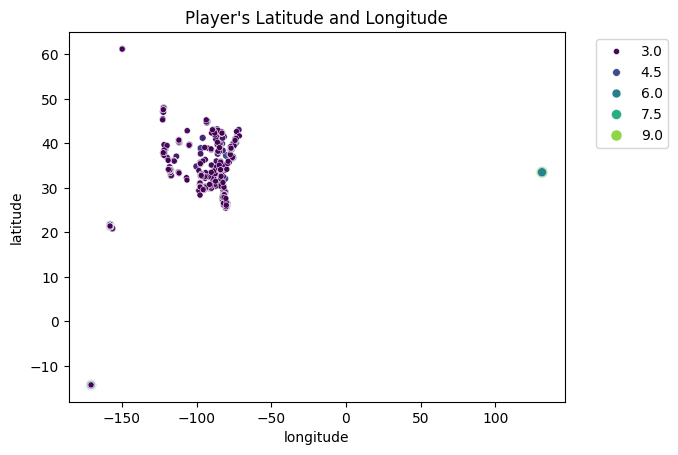

In [33]:
sns.scatterplot(data=anomoly_df, x='longitude', y='latitude', hue='k_means_distance_to_centroid',  size='k_means_distance_to_centroid', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Player's Latitude and Longitude")


In [34]:
# These are some invalid longitude and latitudes 
# Looking at a few of these players, we can noticed that the latitude and longitude do no line up 
anomoly_df[(anomoly_df['longitude'] > 100 )][['name','athlete_id','state_province','hometown_city','latitude', 'longitude']].head() 


,name,athlete_id,state_province,hometown_city,latitude,longitude
0,Marquez Ezzard,4362505.0,NaN,NaN,33.532005,131.349674
1,Brandon Joseph,NaN,NaN,NaN,33.532005,131.349674
2,Jack Zergiotis,4428977.0,NaN,NaN,33.532005,131.349674
3,Arquon Bush,4360067.0,NaN,NaN,33.532005,131.349674
5,Darnell Shields,NaN,NaN,NaN,33.532005,131.349674


In [35]:
# Remove these indixes 
remove_index = list(anomoly_df[(anomoly_df['longitude'] > 100 )][['name','athlete_id','state_province','hometown_city','latitude', 'longitude']].index )
print(f'{len(remove_index)} players fell under this category')
anomoly_df,remove_df = remove_value(anomoly_df,remove_df , indices=remove_index, reason='Invalid Location')


7 players fell under this category


## 3. Long Distance but valid location

This doesn't need to be droped in the dataset. 

In [36]:
# This was probably caught as an anomoly because of the far distance
# This is a valid location though 
anomoly_df[(anomoly_df['longitude'] < 100 )][['name','athlete_id','state_province','hometown_city','latitude', 'longitude']].head()


,name,athlete_id,state_province,hometown_city,latitude,longitude
0,Cleon Aloese,550678.0,AS,Pago Pago,-14.275479,-170.70483
1,Jerry Saena,545354.0,AS,Pago Pago,-14.275479,-170.70483
2,Destiny Vaeao,-1042344.0,AS,Pago Pago,-14.275479,-170.70483
3,Robert Barber,534864.0,AS,Pago Pago,-14.275479,-170.70483
4,Daniel Ekuale,550627.0,AS,Pago Pago,-14.275479,-170.70483


In [37]:
narrow_down_index = list(anomoly_df[(anomoly_df['longitude'] < 100 )][['name','athlete_id','state_province','hometown_city','latitude', 'longitude']].index)
print(f'{len(narrow_down_index)} players fell under this category')
for index in narrow_down_index: 
    anomoly_df = anomoly_df.drop(index)



565 players fell under this category


### Show values in the final dataframes 

Text(0, 0.5, 'Count')

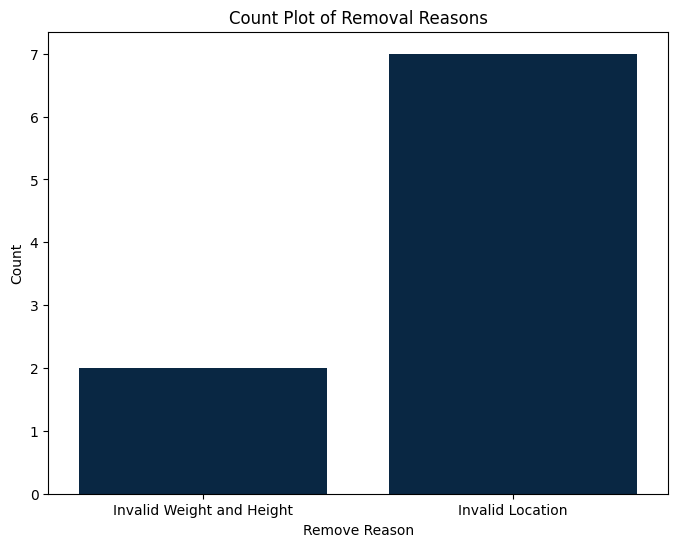

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(x='remove_reason', data=remove_df, color=theme_color_names['blue'])

# Add title and labels
plt.title('Count Plot of Removal Reasons')
plt.xlabel('Remove Reason')
plt.ylabel('Count')

In [39]:
remove_df.head() 

,name,athlete_id,latitude,longitude,latitude_school,longitude_school,committed_to,side_of_ball,position_group,state_province,hometown_city,hometown_country,conference,position,height,weight,distance_miles,stars,win_pct_rolling_2year,rating,k_means_cluster,k_means_pca1,k_means_pca2,k_means_distance_to_centroid,remove_reason
0,Marques Moore,3125868.0,40.961171,-80.557571,41.139094,-81.313460,Kent State,defense,linebacker,OH,New Middletown,USA,Mid-American,ILB,74.0,2000.0,41.260357,1,0.576923,0.6997,5,4.166569,27.714579,38.682786,Invalid Weight and Height
1,Nico Difronzo,NaN,34.146023,-118.806179,38.996970,-104.843616,Air Force,offense,o_line,CA,Westlake Village,USA,Mountain West,OG,75.0,27.0,842.987609,2,0.666667,0.7642,2,-2.053724,-2.329655,3.942978,Invalid Weight and Height
2,Marquez Ezzard,4362505.0,33.532005,131.349674,25.957967,-80.238860,Miami,athlete,athlete,NaN,NaN,USA,ACC,ATH,73.0,213.0,7833.078474,4,0.730769,0.8939,0,1.678195,-2.322391,10.274784,Invalid Location
3,Brandon Joseph,NaN,33.532005,131.349674,33.735267,-84.389949,Georgia State,offense,o_line,NaN,NaN,USA,Sun Belt,OG,74.0,280.0,7242.867348,2,0.416667,0.7903,0,-1.527672,0.102231,9.183271,Invalid Location
4,Jack Zergiotis,4428977.0,33.532005,131.349674,41.759568,-72.618773,UConn,offense,qb,NaN,NaN,USA,FBS Independents,DUAL,72.0,180.0,7016.742209,2,0.166667,0.7842,0,-2.610004,-1.728495,8.932464,Invalid Location


In [40]:
remove_df.to_csv('../data/bad_data_k_means_identified.csv')

## Create Final Dataset

In [41]:
remove_df.columns

Index(['name', 'athlete_id', 'latitude', 'longitude', 'latitude_school',
       'longitude_school', 'committed_to', 'side_of_ball', 'position_group',
       'state_province', 'hometown_city', 'hometown_country', 'conference',
       'position', 'height', 'weight', 'distance_miles', 'stars',
       'win_pct_rolling_2year', 'rating', 'k_means_cluster', 'k_means_pca1',
       'k_means_pca2', 'k_means_distance_to_centroid', 'remove_reason'],
      dtype='object')

In [42]:
# remove_df['name'].head() 
remove_df[remove_df['name'] == 'Brandon Joseph'].head()
remove_df = remove_df[['name', 'height', 'weight', 'longitude', 'latitude']]
remove_df.head() 
# name, long, lat, hiegh, weight

,name,height,weight,longitude,latitude
0,Marques Moore,74.0,2000.0,-80.557571,40.961171
1,Nico Difronzo,75.0,27.0,-118.806179,34.146023
2,Marquez Ezzard,73.0,213.0,131.349674,33.532005
3,Brandon Joseph,74.0,280.0,131.349674,33.532005
4,Jack Zergiotis,72.0,180.0,131.349674,33.532005


In [43]:
df = pd.read_csv('../data/imputed_dataset.csv')
df.head()

,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,is_drafted,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group
0,Dorial Green-Beckham,0.9997,1.0,2012,WR,78.0,220.0,37.216678,-93.292037,Springfield,MO,USA,5,Missouri,531380.0,1.0,SEC,38.935849,-92.333201,18.0,26.0,1.0,300.0,0.692308,129.726375,offense,pass_catcher
1,Mario Edwards,0.9995,2.0,2012,DT,75.0,285.0,33.215039,-97.133052,Denton,TX,USA,5,Florida State,530290.0,1.0,ACC,30.438169,-84.304403,19.0,27.0,2.0,366.0,0.703704,776.590432,defense,d_line
2,D.J. Humphries,0.9979,3.0,2012,OT,77.0,275.0,35.227200,-80.843083,Charlotte,NC,USA,5,Florida,-1009881.0,1.0,SEC,29.649936,-82.348579,15.0,26.0,2.0,178.0,0.576923,395.212334,offense,o_line
3,Shaq Thompson,0.9975,4.0,2012,S,74.0,210.0,38.581572,-121.494400,Sacramento,CA,USA,5,Washington,535329.0,1.0,Big Ten,47.650323,-122.301575,14.0,26.0,1.0,-130.0,0.538462,627.908306,defense,d_backfield
4,Noah Spence,0.9974,5.0,2012,WDE,75.0,235.0,40.266311,-76.886112,Harrisburg,PA,USA,5,Ohio State,-1027150.0,1.0,Big Ten,40.001645,-83.019727,18.0,26.0,1.0,363.0,0.692308,324.459618,defense,d_line


In [44]:
# Merge both DataFrames on all the relevant columns and find the differences
df_filtered = pd.merge(df, remove_df, on=['name', 'height', 'weight', 'longitude', 'latitude'], how='left', indicator=True)

# Keep only rows that are not in remove_df
df_filtered = df_filtered[df_filtered['_merge'] == 'left_only']

# # Drop the '_merge' column
df_filtered = df_filtered.drop(columns=['_merge'])

In [45]:
df_filtered.head() 

,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,is_drafted,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group
0,Dorial Green-Beckham,0.9997,1.0,2012,WR,78.0,220.0,37.216678,-93.292037,Springfield,MO,USA,5,Missouri,531380.0,1.0,SEC,38.935849,-92.333201,18.0,26.0,1.0,300.0,0.692308,129.726375,offense,pass_catcher
1,Mario Edwards,0.9995,2.0,2012,DT,75.0,285.0,33.215039,-97.133052,Denton,TX,USA,5,Florida State,530290.0,1.0,ACC,30.438169,-84.304403,19.0,27.0,2.0,366.0,0.703704,776.590432,defense,d_line
2,D.J. Humphries,0.9979,3.0,2012,OT,77.0,275.0,35.227200,-80.843083,Charlotte,NC,USA,5,Florida,-1009881.0,1.0,SEC,29.649936,-82.348579,15.0,26.0,2.0,178.0,0.576923,395.212334,offense,o_line
3,Shaq Thompson,0.9975,4.0,2012,S,74.0,210.0,38.581572,-121.494400,Sacramento,CA,USA,5,Washington,535329.0,1.0,Big Ten,47.650323,-122.301575,14.0,26.0,1.0,-130.0,0.538462,627.908306,defense,d_backfield
4,Noah Spence,0.9974,5.0,2012,WDE,75.0,235.0,40.266311,-76.886112,Harrisburg,PA,USA,5,Ohio State,-1027150.0,1.0,Big Ten,40.001645,-83.019727,18.0,26.0,1.0,363.0,0.692308,324.459618,defense,d_line


In [46]:
print(f'Original Dataset: {df.shape[0]}') 
print(f'Remove Dataset: {remove_df.shape[0]}') 
print(f'Filtered Dataset: {df_filtered.shape[0]}') 

Original Dataset: 23947
Remove Dataset: 9
Filtered Dataset: 23938


In [47]:
df_filtered.head() 

,name,rating,ranking,year,position,height,weight,latitude,longitude,hometown_city,state_province,hometown_country,stars,committed_to,athlete_id,is_drafted,conference,latitude_school,longitude_school,wins_rolling_2year,games_played_rolling_2year,post_season_wins_rolling_2year,point_diff_rolling_2year,win_pct_rolling_2year,distance_miles,side_of_ball,position_group
0,Dorial Green-Beckham,0.9997,1.0,2012,WR,78.0,220.0,37.216678,-93.292037,Springfield,MO,USA,5,Missouri,531380.0,1.0,SEC,38.935849,-92.333201,18.0,26.0,1.0,300.0,0.692308,129.726375,offense,pass_catcher
1,Mario Edwards,0.9995,2.0,2012,DT,75.0,285.0,33.215039,-97.133052,Denton,TX,USA,5,Florida State,530290.0,1.0,ACC,30.438169,-84.304403,19.0,27.0,2.0,366.0,0.703704,776.590432,defense,d_line
2,D.J. Humphries,0.9979,3.0,2012,OT,77.0,275.0,35.227200,-80.843083,Charlotte,NC,USA,5,Florida,-1009881.0,1.0,SEC,29.649936,-82.348579,15.0,26.0,2.0,178.0,0.576923,395.212334,offense,o_line
3,Shaq Thompson,0.9975,4.0,2012,S,74.0,210.0,38.581572,-121.494400,Sacramento,CA,USA,5,Washington,535329.0,1.0,Big Ten,47.650323,-122.301575,14.0,26.0,1.0,-130.0,0.538462,627.908306,defense,d_backfield
4,Noah Spence,0.9974,5.0,2012,WDE,75.0,235.0,40.266311,-76.886112,Harrisburg,PA,USA,5,Ohio State,-1027150.0,1.0,Big Ten,40.001645,-83.019727,18.0,26.0,1.0,363.0,0.692308,324.459618,defense,d_line


In [48]:
df_filtered.to_csv('../data/base_population.csv')